In [ ]:
!pip install --upgrade matplotlib

In [ ]:
!pip install basemap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv("/content/Meteorite_Landings.csv")
data.sort_values("id").reset_index(drop=True)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.8, -105.41667)"
3,Abbott,5,Valid,H3-6,21100.0,Found,1951.0,36.30000,-104.28333,"(36.3, -104.28333)"
4,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
...,...,...,...,...,...,...,...,...,...,...
45711,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012.0,40.89201,-118.55319,"(40.89201, -118.55319)"
45712,Antelope,57455,Valid,H4,754.0,Found,2012.0,40.90183,-118.54465,"(40.90183, -118.54465)"
45713,Northwest Africa 7870,57456,Valid,L4,42.0,Found,2004.0,0.00000,0.00000,"(0.0, 0.0)"
45714,Northwest Africa 7871,57457,Valid,L6,450.0,Found,2004.0,0.00000,0.00000,"(0.0, 0.0)"


Data Prep

In [4]:
# Checking for Null Values
data.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [5]:
# Checking Min and Max mass
data['mass (g)'].min(), data['mass (g)'].max()

(0.0, 60000000.0)

In [6]:
# Filling missing mass values with Median
data["mass (g)"].fillna(data["mass (g)"].median(), inplace=True)

In [7]:
# Checking for duplicates
dupe= data.duplicated(subset = ["id","name","recclass","mass (g)"])
data[dupe]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation


In [8]:
data.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)          0
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

Ignoring the Missing Values in year, reclat, reclong and GeoLocation as of now. Will be removing them based on the type of plots

### Question 1

What is the distribution of meteorite landings worldwide in terms of latitude and longitude? Are
there any regions that show a higher concentration of meteorite falls?



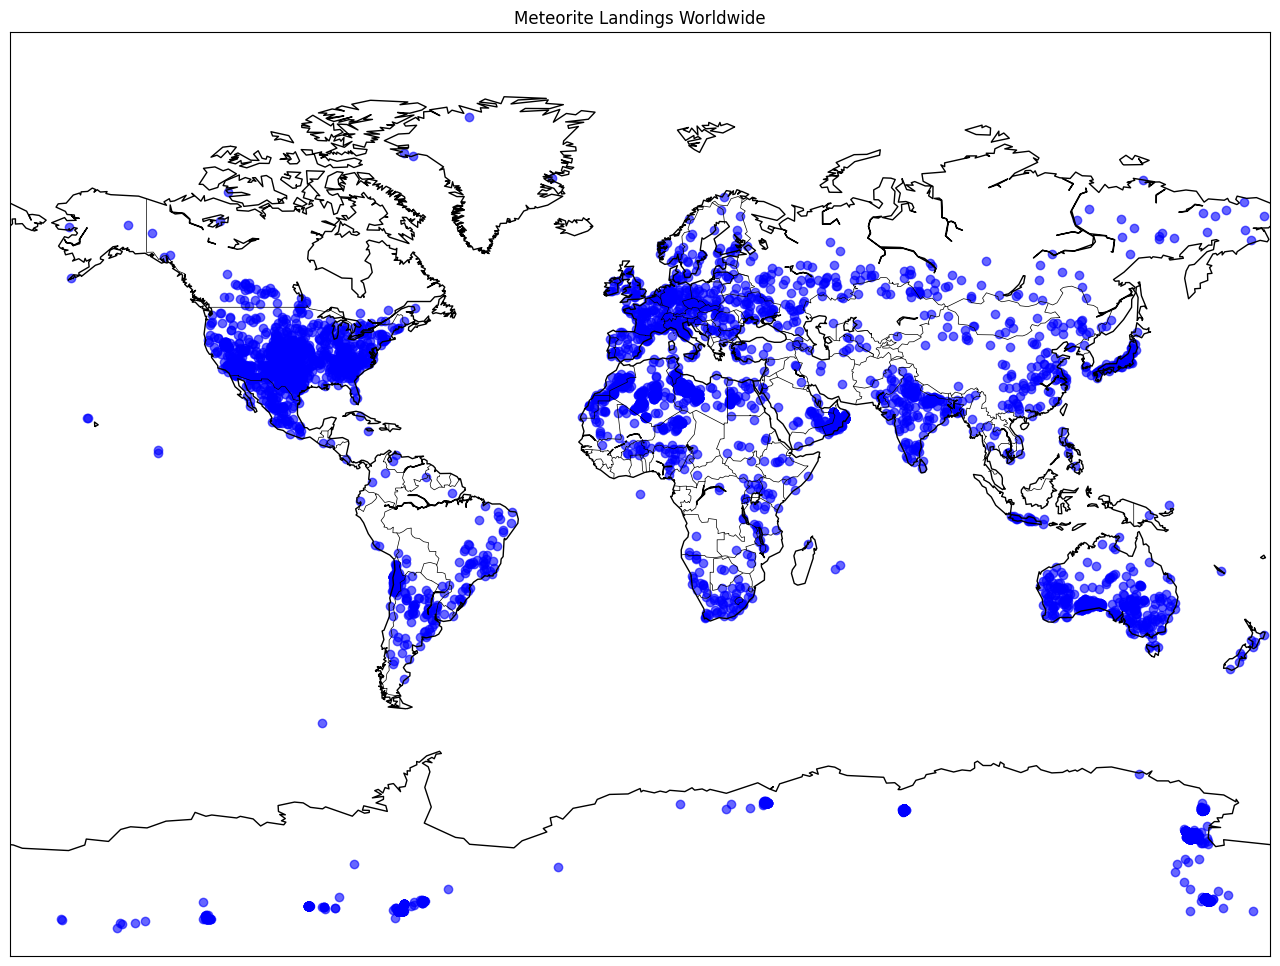

In [9]:
from mpl_toolkits.basemap import Basemap

# Remove the Columns containing not Location Information
data_with_locations = data.dropna(subset=['reclat','reclong','GeoLocation'])

# Group the data by latitude and longitude and count the number of meteorites at each location
location_counts = data_with_locations.groupby(['reclat', 'reclong']).size().reset_index(name='counts')

# Normalize the counts to determine the size of the bubbles
max_count = location_counts['counts'].max()
location_counts['sizes'] = location_counts['counts'] / max_count * 100

# Create a Basemap
plt.figure(figsize=(24, 12))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines, countries
m.drawcoastlines()
m.drawcountries()

# Convert latitude and longitude to map coordinates
x, y = m(location_counts['reclong'].values, location_counts['reclat'].values)

# Plot bubbles
m.scatter(x, y, alpha=0.6, color='blue')
# m.scatter(x, y, s=location_counts['sizes']*10, alpha=0.6, color='blue')

# Add a title
plt.title('Meteorite Landings Worldwide')

# Show the plot
plt.show()

From the above graph, we can infer at which locations many meteorites were discovered


---
Answer generated by Google Gemini
- Bias towards populated areas: Meteorites are more likely to be found and reported in populated areas. This is because there are more people who can see them fall, and more infrastructure in place to track them down. Deserts, for example, are some of the most common places for meteorites to land, but they are also some of the least populated areas on Earth. So while there may be a high concentration of meteorites in deserts, they are simply not being found and reported at the same rate as meteorites in other parts of the world.

- Bias towards recoverable meteorites:  Meteorites that land in water are much less likely to be recovered than meteorites that land on land. This is because they are more difficult to find, and they may be broken up into smaller pieces by the impact. So while there may be just as many meteorites landing in the ocean as there are landing on land, we simply don't have as good of a record of them.

### Question 2

Is there any correlation between the type of meteorite and its fell/found status? Do certain types of
meteorites tend to be discovered more often than others?

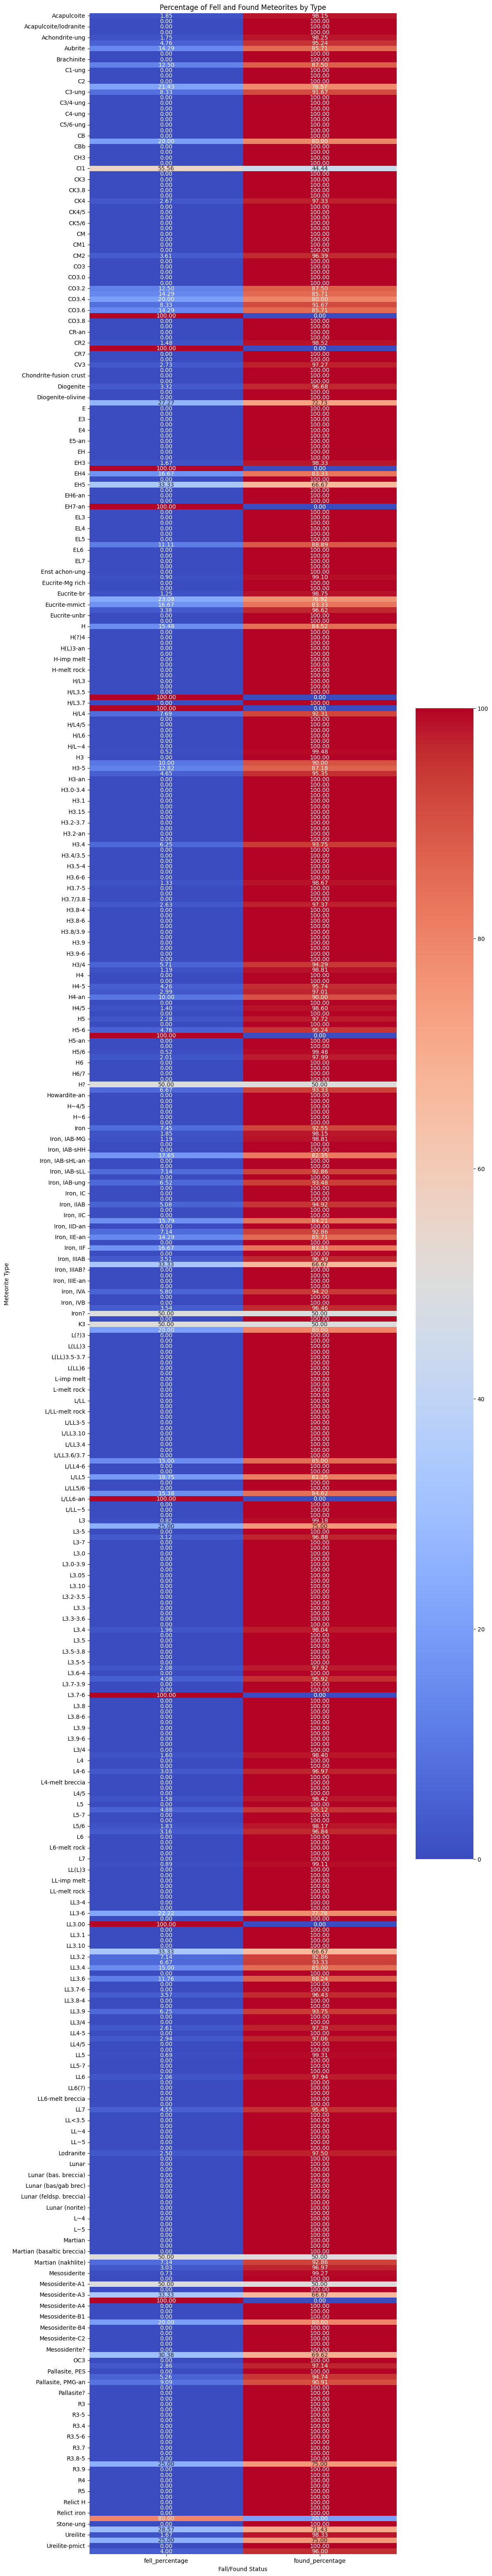

In [10]:
# Group the data by recclass and fall, and count the number of meteorites for each combination
type_fall_counts = data.groupby(['recclass', 'fall']).size().reset_index(name='counts')

# Pivot the table to have recclass as rows and fall as columns
pivot_table = type_fall_counts.pivot(index='recclass', columns='fall', values='counts').fillna(0)

# Calculate the total count of meteorites for each recclass
pivot_table['total'] = pivot_table['Fell'] + pivot_table['Found']

# Calculate the percentage of fell and found meteorites for each recclass
pivot_table['fell_percentage'] = (pivot_table['Fell'] / pivot_table['total']) * 100
pivot_table['found_percentage'] = (pivot_table['Found'] / pivot_table['total']) * 100

# Plotting
plt.figure(figsize=(12, 80))

# Create a heatmap
sns.heatmap(data=pivot_table[['fell_percentage', 'found_percentage']], cmap='coolwarm', annot=True, fmt=".2f")

# Add labels and title
plt.xlabel('Fall/Found Status')
plt.ylabel('Meteorite Type')
plt.title('Percentage of Fell and Found Meteorites by Type')

# Show the plot
plt.show()

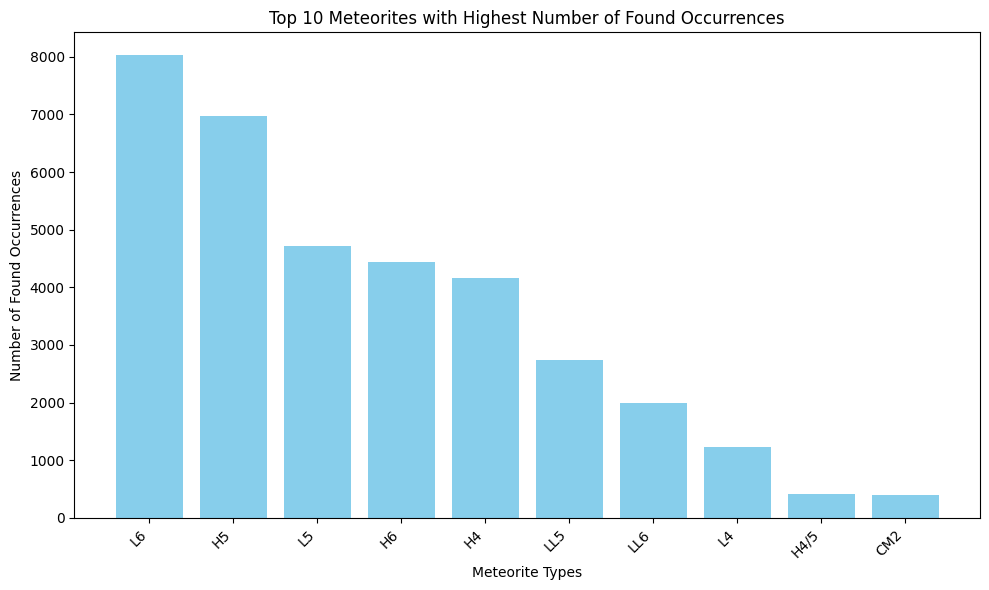

In [11]:
# Filter the dataset for meteorites with the "Found" fall status
found_meteorites = data[data['fall'] == 'Found']

# Group the data by meteorite name and count the number of occurrences
found_counts = found_meteorites['recclass'].value_counts().reset_index()
found_counts.columns = ['recclass', 'found_count']

# Sort the data by count in descending order and select the top 10
top_10_found = found_counts.sort_values(by='found_count', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar(top_10_found['recclass'], top_10_found['found_count'], color='skyblue')

# Add labels and title
plt.xlabel('Meteorite Types')
plt.ylabel('Number of Found Occurrences')
plt.title('Top 10 Meteorites with Highest Number of Found Occurrences')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

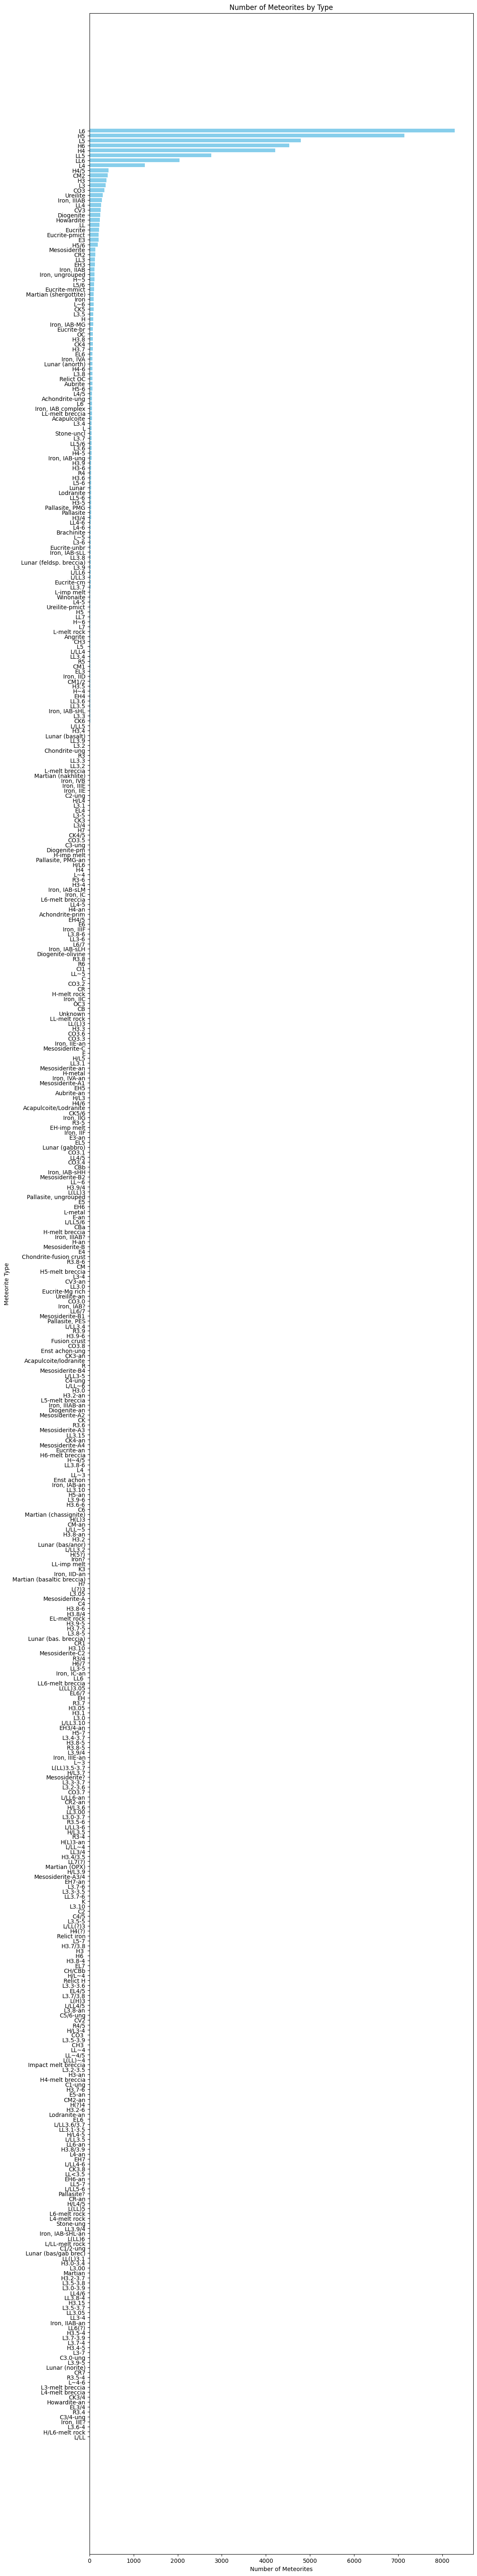

In [12]:
# Group the data by recclass and count the number of meteorites for each type
type_counts = data['recclass'].value_counts().reset_index()
type_counts.columns = ['recclass', 'count']

# Sort the data by count in descending order
type_counts = type_counts.sort_values(by='count', ascending=True)

# Plotting
plt.figure(figsize=(12, 80))

# Create a horizontal bar plot
plt.barh(type_counts['recclass'], type_counts['count'], color='skyblue')

# Add labels and title
plt.xlabel('Number of Meteorites')
plt.ylabel('Meteorite Type')
plt.title('Number of Meteorites by Type')

# Show the plot
plt.show()

In [13]:
from scipy.stats import chi2_contingency

# Create a contingency table for meteorite type and fell status
contingency_table = pd.crosstab(data['recclass'], data['fall'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-square statistic: 3181.030655586693
p-value: 0.0
Degrees of freedom: 465


Answer Generated by ChatGPT

The output you provided indicates that the chi-square statistic is quite large (3181.03), and the p-value is very close to zero (0.0). This suggests strong evidence against the null hypothesis of independence between meteorite type and fell status. In other words, there is a significant correlation between these two categorical variables.

The degrees of freedom (465) correspond to the number of categories minus one in each variable multiplied together. This is expected given the large number of categories in the contingency table.

The low p-value indicates that the observed association between meteorite type and fell status is unlikely to have occurred by chance alone, further supporting the rejection of the null hypothesis.

Overall, this analysis suggests that meteorite type and fell status are correlated, which could have implications for optimizing search strategies and improving meteorite classification methods.

--------------------------------------
Answer Generated by ChatGPT

Based on the analysis conducted using the chi-square test for independence, the results indicate a significant correlation between the type of meteorite and its fell/found status. The chi-square statistic of 3181.03 with a p-value of 0.0 suggests that the relationship between these two variables is unlikely to be due to chance. Additionally, with 465 degrees of freedom, we have a substantial amount of data contributing to this analysis.

The chi-square test for independence evaluates whether there is a relationship between two categorical variables by comparing the observed frequencies in a contingency table to the frequencies we would expect if the variables were independent. In this case, the contingency table examines the distribution of meteorite types (recclass) based on whether they were observed falling (Fell) or discovered after impact (Found).

The significance of this correlation lies in its potential implications for meteorite recovery initiatives and understanding the mechanisms governing meteorite finding and preservation. Here are some key insights and potential applications:

1. **Optimizing search strategies:** By understanding which types of meteorites are more likely to be found versus observed falling, researchers and meteorite recovery teams can optimize their search strategies. For example, if certain types are predominantly found after impact, efforts can be focused on areas where such meteorites are more likely to have landed.

2. **Improving classification methods:** The correlation between meteorite type and fell/found status can inform the refinement of meteorite classification methods. If certain types are consistently found or observed falling, it may indicate unique characteristics or behaviors that can be used to refine classification criteria.

3. **Enhancing preservation efforts:** Understanding the distribution of meteorite types based on fell/found status can also aid in prioritizing preservation efforts. Meteorites observed falling may be more prone to immediate collection and preservation efforts, while those discovered after impact may require different preservation strategies based on their type.

4. **Advancing meteorite research:** By gaining insights into the relationship between meteorite type and fell/found status, researchers can further our understanding of meteorite composition, origins, and dynamics. This can contribute to broader scientific inquiries related to planetary formation, asteroid impacts, and the history of our solar system.

In conclusion, the significant correlation between meteorite type and fell/found status identified through the chi-square test underscores the importance of considering both variables in meteorite research and recovery efforts. Utilizing this information can lead to more efficient search strategies, improved classification methods, and enhanced preservation efforts, ultimately advancing our understanding of meteorites and their significance in planetary science.

---

Answer Generated by Google Gemini

The output you obtained from the chi-square test suggests a very strong correlation between the type of meteorite (recclass) and its fell/found status (fall). Here's a breakdown of the results:

* **Chi-square statistic (3181.03):** This value is very high, indicating a strong rejection of the null hypothesis. The null hypothesis in this case would be that there's no association between meteorite type and fell status.
* **p-value (0.0):** An incredibly small p-value (essentially 0) signifies that the observed association between meteorite type and fell status is statistically significant. It's very unlikely to have happened by random chance.
* **Degrees of freedom (465):** This value reflects the number of comparisons made in the chi-square test (466 in this case).

Since the p-value is very low (0.0) and the chi-square statistic is high (3181.03), we can confidently reject the null hypothesis. This means there's a statistically significant correlation between the type of meteorite and whether it was observed falling (Fell) or found later (Found).

**Interpretation in context of the research question:**

The research question aimed to understand if there's a connection between meteorite type and how they are discovered (fell vs found). The chi-square test results strongly suggest that such a correlation exists. This implies certain types of meteorites might be easier to spot during their fall or upon landing compared to others.

**Possible reasons for the correlation:**

* **Visibility during fall:** Brighter or larger meteorites might be more easily observed during their descent, leading to a higher chance of being classified as "Fell."
* **Preservation after landing:** Some meteorite types might be more resistant to weathering and degradation, making them more likely to be discovered later even if their fall wasn't witnessed.

**Further steps:**

* Analyze the contingency table to see which specific meteorite types are more commonly Fell or Found.
* Investigate the physical or chemical properties of meteorite types that might explain the observed correlation.

By understanding this relationship between meteorite type and fell status, researchers can improve strategies for finding meteorites. They can focus their search efforts on locations or conditions more likely to yield specific meteorite types based on their "fell" probability. Additionally, this information can aid in developing better classification methods for meteorites based on both their composition and how they were discovered.


### Question 3

How has the frequency of meteorite landings changed over time? Are there any significant patterns
or anomalies in the number of meteorites falling or being discovered in different years?

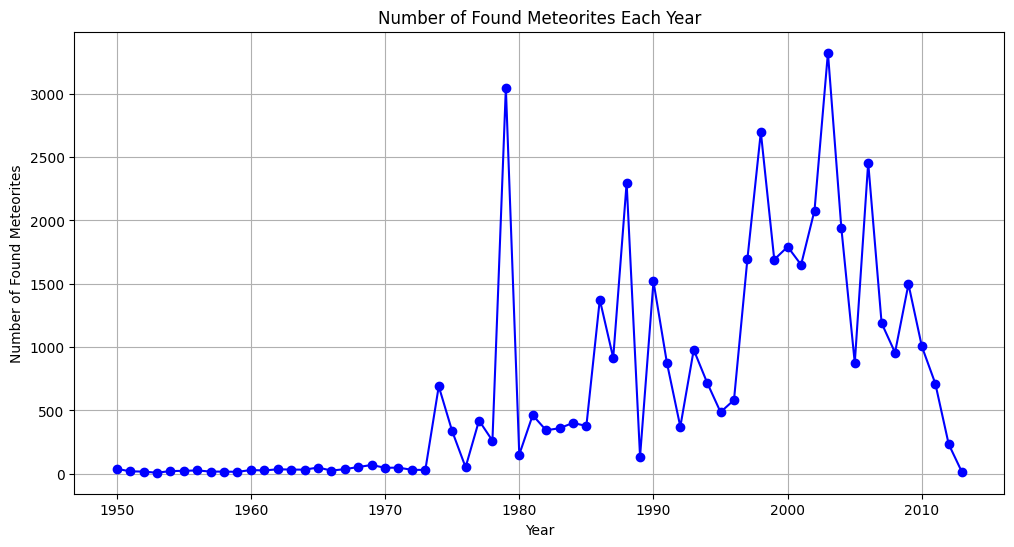

In [14]:
# Dropping columns without Years
data_with_dates = data.dropna(subset=['year'])

# Filter for years greater than or equal to 1950 and less than or equal to 2024
found_meteorites = data_with_dates[((data_with_dates['year'] >= 1950) & (data_with_dates['year'] <= 2024))]

# Group the data by year and count the number of found meteorites for each year
found_counts_by_year = found_meteorites.groupby('year').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))

# Create a line plot
plt.plot(found_counts_by_year['year'], found_counts_by_year['count'], marker='o', color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Found Meteorites')
plt.title('Number of Found Meteorites Each Year')

# Show the plot
plt.grid(True)
plt.show()

Answer Generated by Google Gemini

The graph you sent doesn't show a significant pattern in the number of meteorites found over time. There is some variation from year to year, but no clear upward or downward trend.

It's important to note that this graph likely reflects the number of meteorites that were discovered, not necessarily the number that actually landed on Earth in a given year. There are a few reasons for this:

- Detection bias: In the past, there were fewer people looking for meteorites, and fewer technological tools to help us find them. So, we are likely to have missed many meteorites that landed earlier in history.
- Recovery bias: Smaller meteorites are harder to find than larger ones. So, the data is likely to be biased towards finding larger meteorites.

So, while the graph doesn't show a clear pattern, it doesn't necessarily mean that the rate of meteorite landings hasn't changed over time.

### Other Visualizaitons

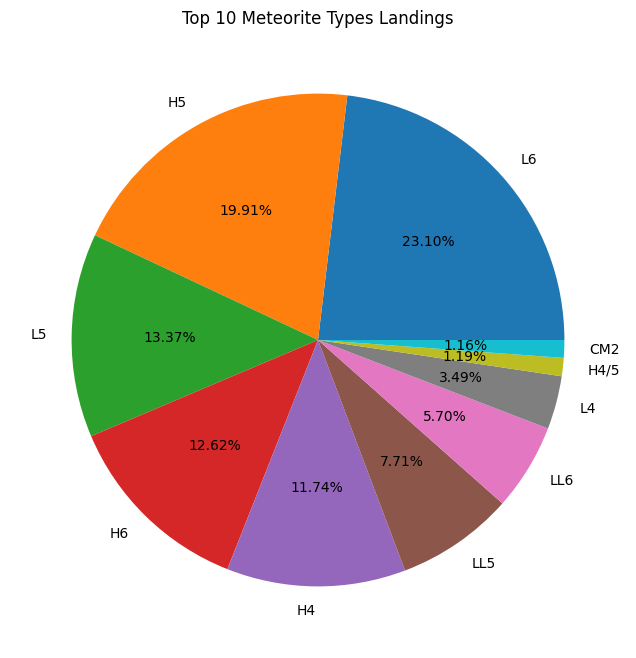

In [15]:
# Top Meteorite Types
types = data["recclass"].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(types, autopct='%.2f%%', labels= types.index)

plt.title("Top 10 Meteorite Types Landings")

plt.show()

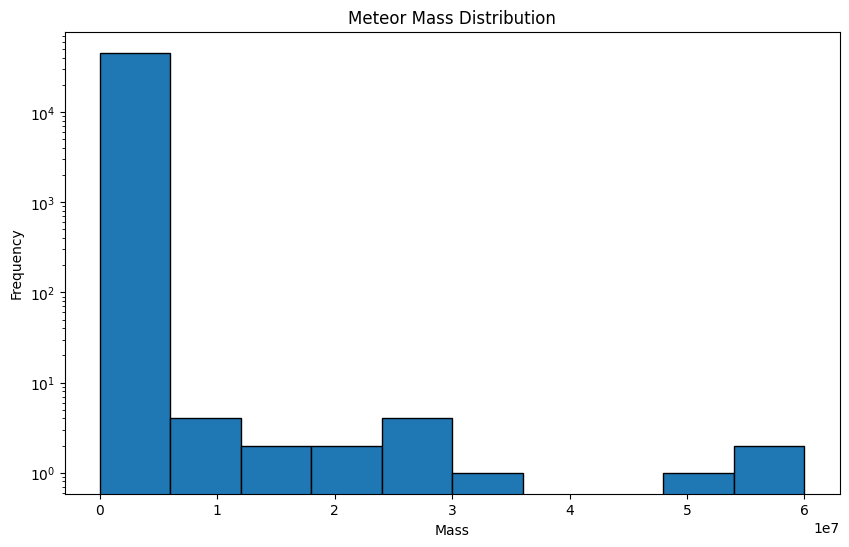

In [16]:
# Metreor Mass Distribution
plt.figure(figsize=(10, 6))
# using log as data has a widew range of mass values
plt.hist(data["mass (g)"], log= True, edgecolor="black")

plt.title('Meteor Mass Distribution')
plt.xlabel('Mass')
plt.ylabel('Frequency')

plt.show()

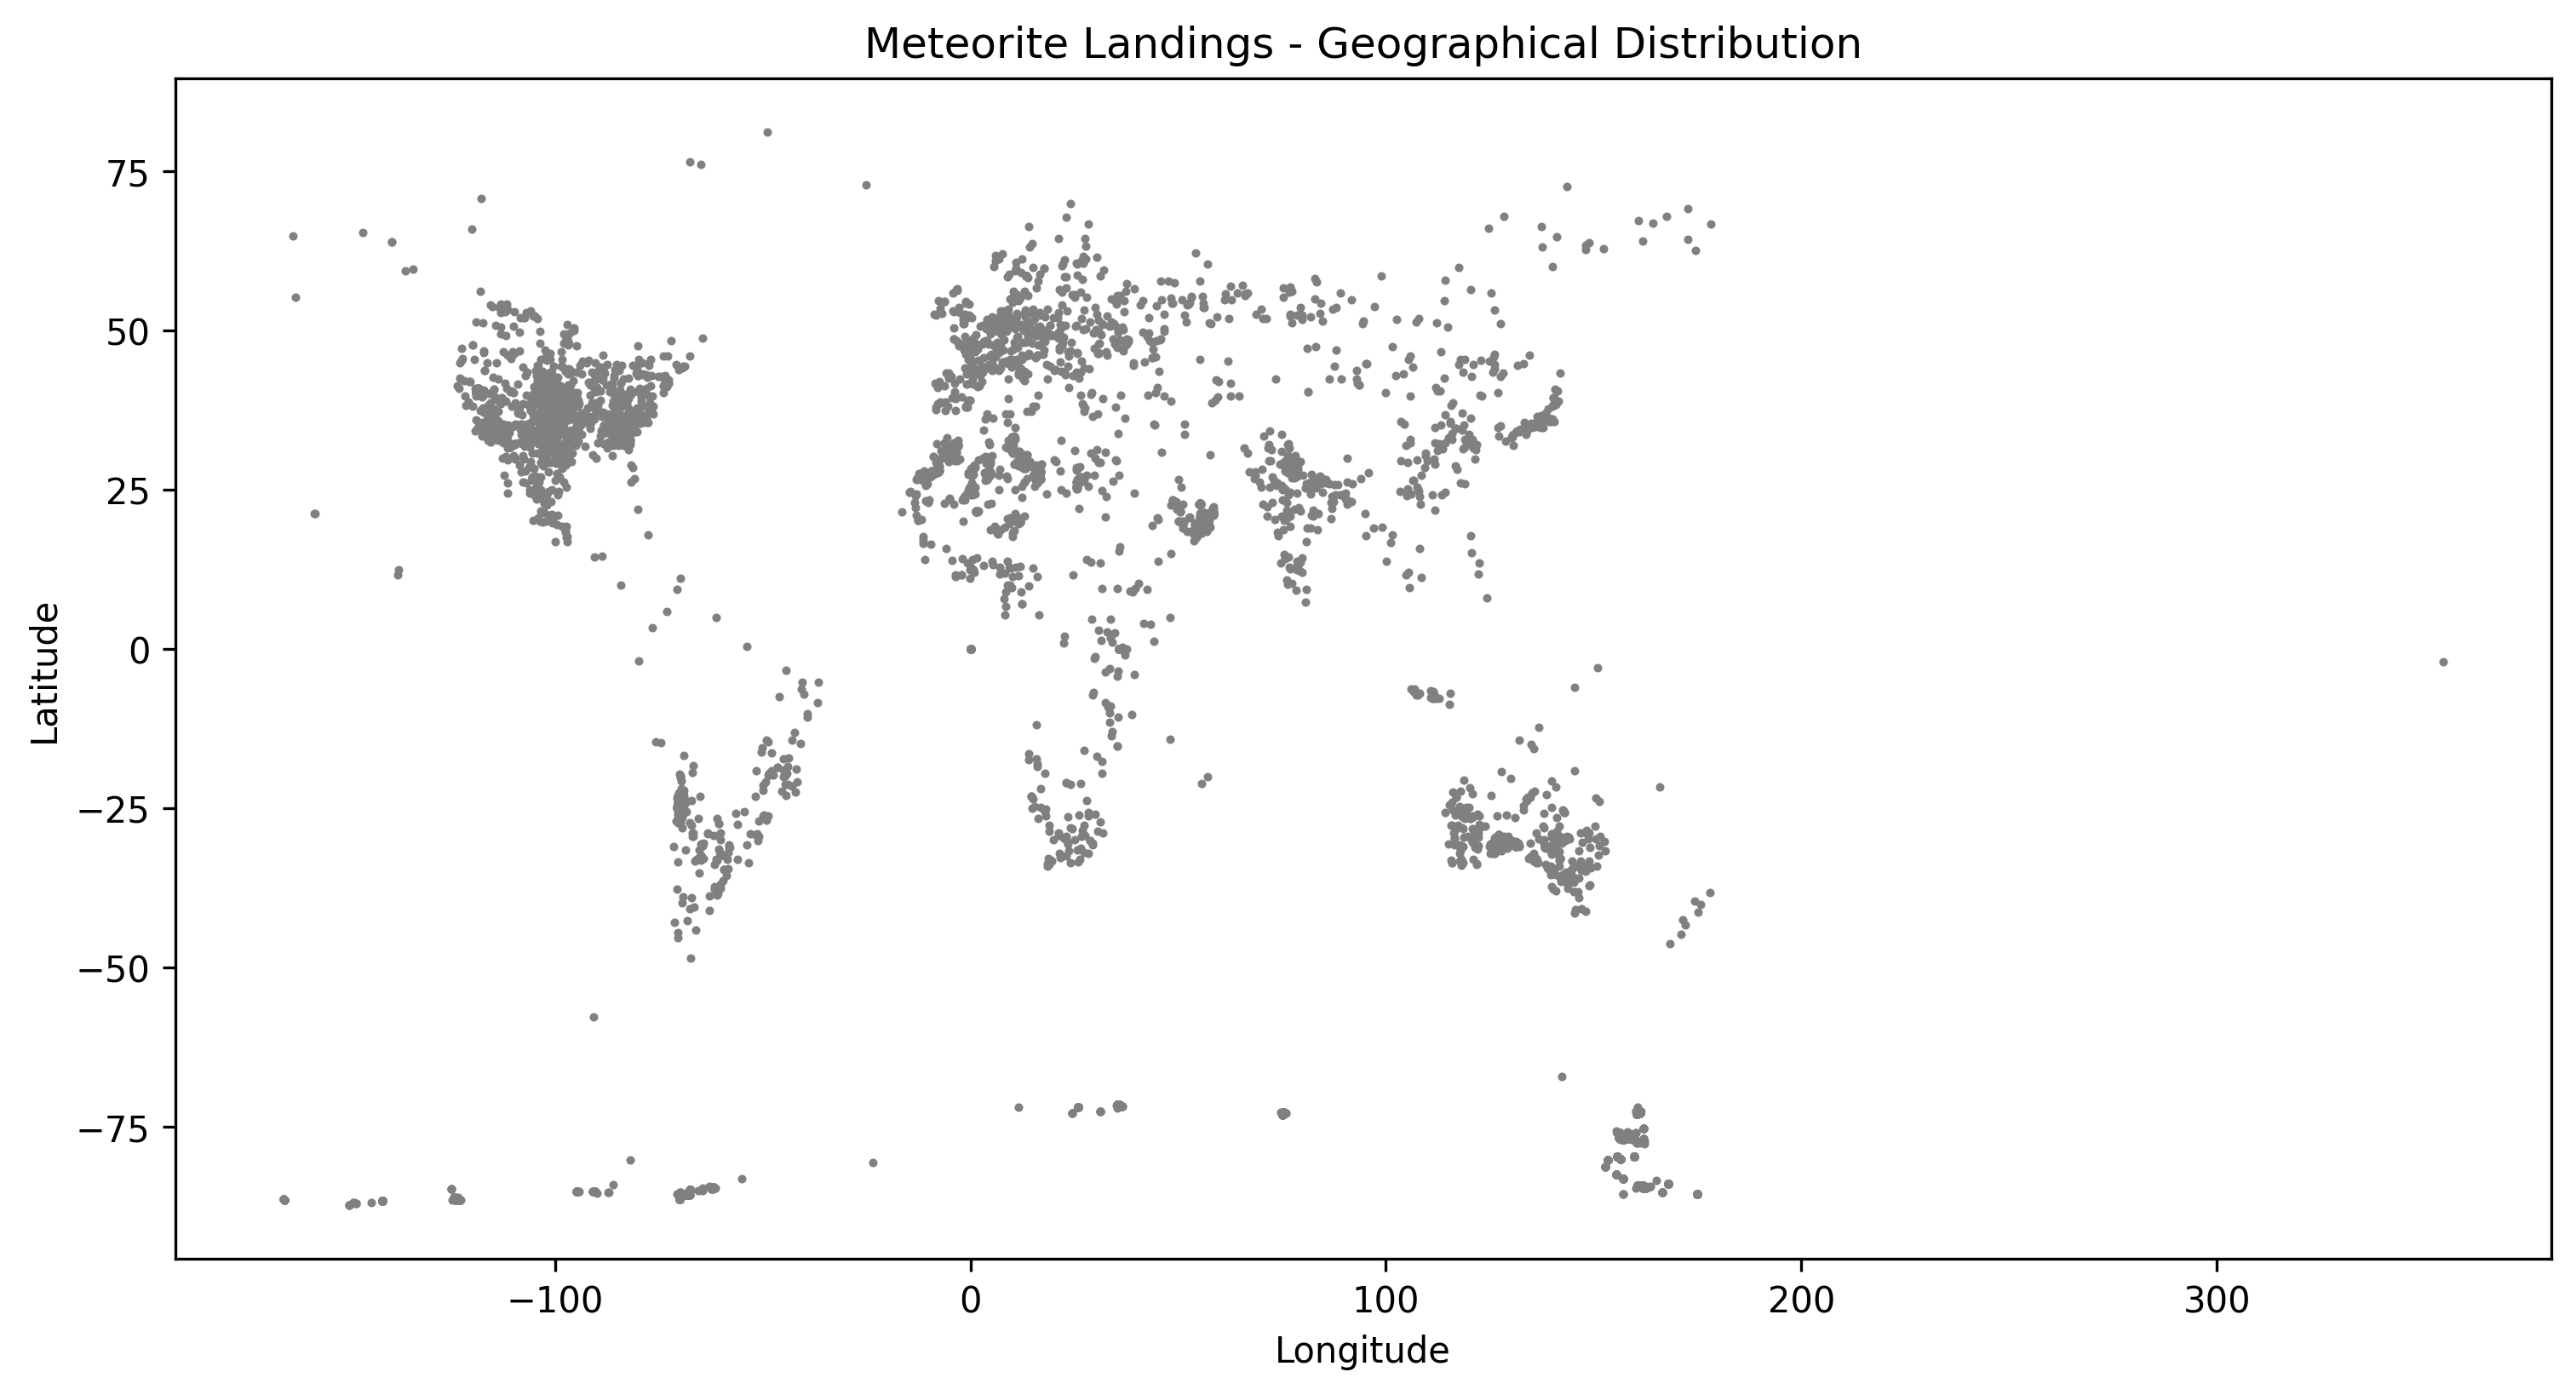

In [17]:
# Meteorite Landings Distributions
# Remove the Columns containing not Location Information
data_with_locations = data.dropna(subset=['reclat','reclong','GeoLocation'])

plt.figure(figsize=(12,6), dpi=300)
plt.scatter(x= "reclong", y="reclat", data=data_with_locations, color="grey",s=2)

plt.title("Meteorite Landings - Geographical Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [18]:
# Top 10 largest Meteorites Locations
import plotly.express as px

top_10_largest = data.sort_values(by='mass (g)', ascending=False).head(10)

fig = px.scatter_geo(top_10_largest, lat='reclat', lon='reclong', hover_name='name', size='mass (g)',
                     projection='natural earth', title='Top 10 Largest Meteorites by Mass')
fig.show()